<a href="https://colab.research.google.com/github/taniahdez75/st/blob/main/datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import basic libraries
import numpy as np 
import pandas as pd 
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel('https://github.com/fenago/python4DS/blob/main/default_credit_clients.xls?raw=true')

In [ ]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [ ]:
# Getting Meta Data Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# Checking for Null Values 
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
print('SEX ' + str(sorted(df['SEX'].unique())))

SEX [1, 2]


In [ ]:
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

EDUCATION [0, 1, 2, 3, 4, 5, 6]


In [ ]:
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))

MARRIAGE [0, 1, 2, 3]


In [ ]:
print('PAY_0 ' + str(sorted(df['PAY_0'].unique())))

PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4

In [ ]:
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

EDUCATION [1, 2, 3, 4]


In [ ]:
fill = (df.MARRIAGE == 0)
df.loc[fill, 'MARRIAGE'] = 3

In [ ]:
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))

MARRIAGE [1, 2, 3]


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df = df.rename(columns={'default payment next month': 'DEFAULT', 'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<Axes: xlabel='DEFAULT', ylabel='count'>

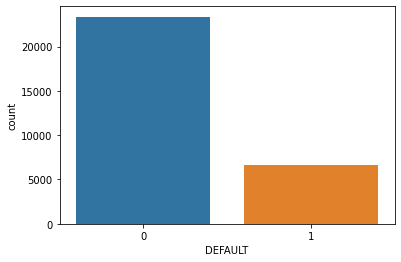

In [ ]:
sns.countplot(x="DEFAULT", data=df)

In [ ]:
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [ ]:
6636/(6636 + 23364)


0.2212

<Axes: xlabel='SEX', ylabel='count'>

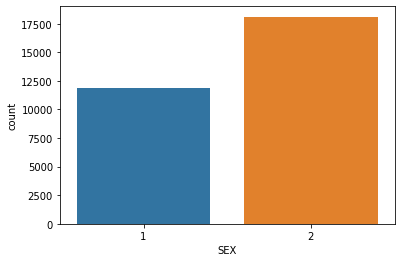

In [ ]:
sns.countplot(x="SEX", data=df)

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

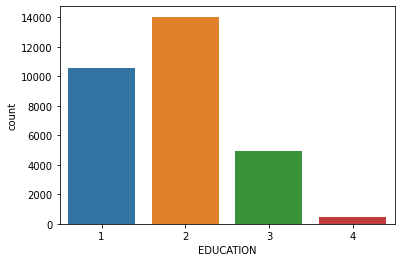

In [ ]:
sns.countplot(x="EDUCATION", data=df)

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

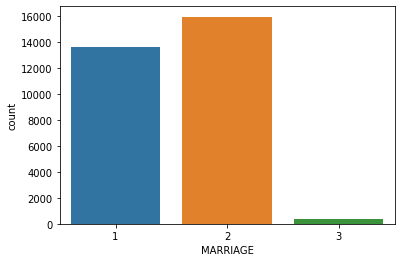

In [ ]:
sns.countplot(x="MARRIAGE", data=df)

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

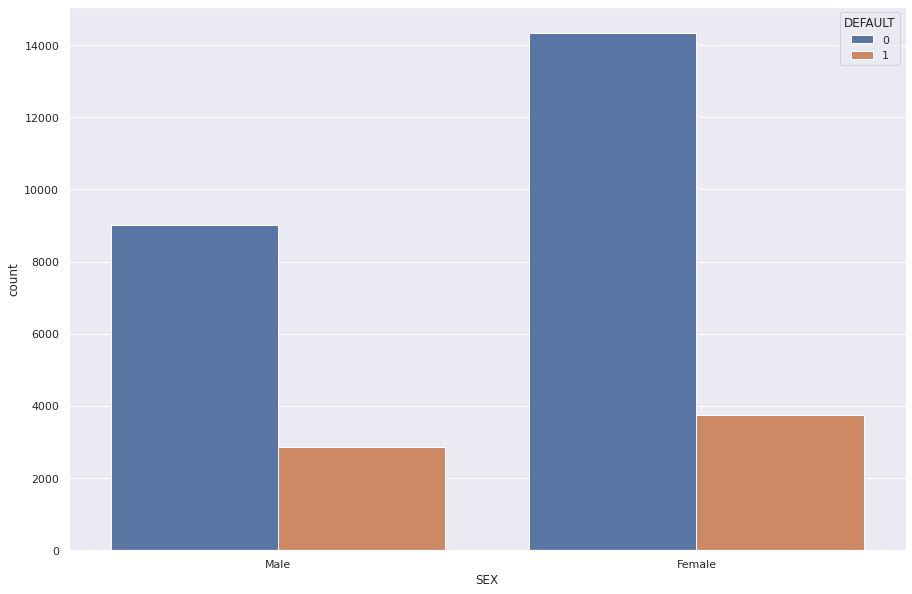

In [ ]:
# Bivariate Analysis
sns.set(rc={'figure.figsize':(15,10)})
edu = sns.countplot(x='SEX', hue='DEFAULT', data=df)
edu.set_xticklabels(['Male','Female'])
plt.show()

In [ ]:
pd.crosstab(df.SEX,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
SEX,,
1,0.758328,0.241672
2,0.792237,0.207763
All,0.778800,0.221200


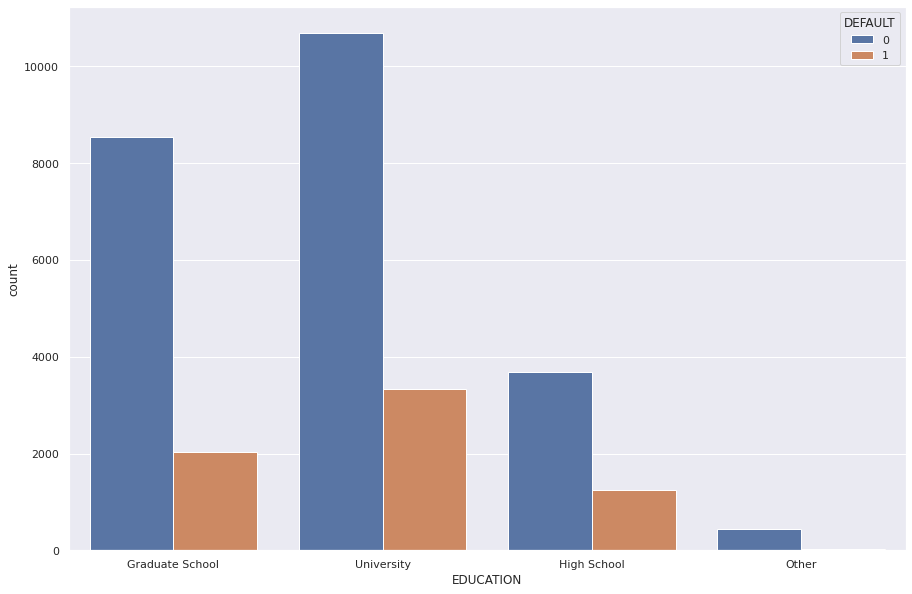

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

In [ ]:
pd.crosstab(df.EDUCATION,df.DEFAULT,normalize='index')

DEFAULT,0,1
EDUCATION,,
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.929487,0.070513


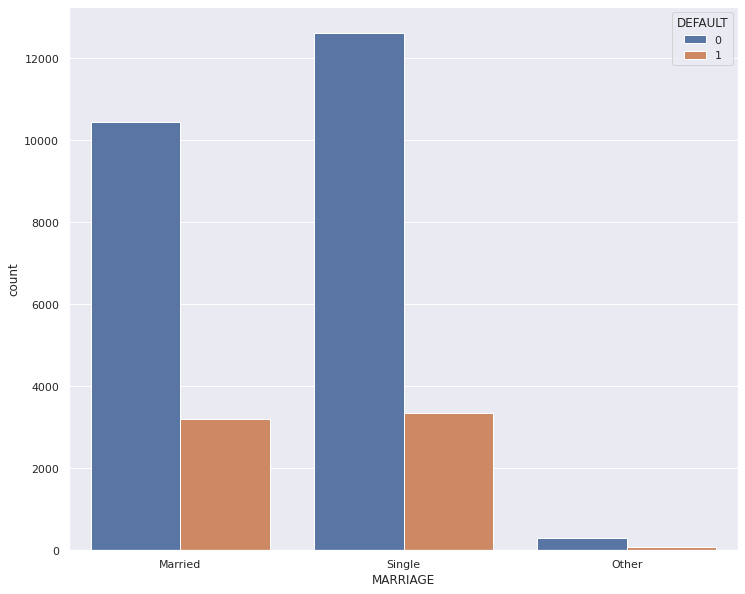

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
marriage = sns.countplot(x="MARRIAGE", hue='DEFAULT', data=df)
marriage.set_xticklabels(['Married','Single','Other'])
plt.show()

In [ ]:
pd.crosstab(df.MARRIAGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
MARRIAGE,,
1,0.765283,0.234717
2,0.790717,0.209283
3,0.763926,0.236074
All,0.778800,0.221200


In [ ]:
pd.crosstab(df.PAY_1,df.DEFAULT,margins=True)

DEFAULT,0,1,All
PAY_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


In [ ]:
# Payment status of the most current month:
pd.crosstab(df.PAY_1,df.DEFAULT,margins=True,normalize='index')

DEFAULT,0,1
PAY_1,,
-2,0.867706,0.132294
-1,0.832219,0.167781
0,0.871887,0.128113
1,0.660521,0.339479
2,0.308586,0.691414
3,0.242236,0.757764
4,0.315789,0.684211
5,0.500000,0.500000
6,0.454545,0.545455


In [ ]:
pd.crosstab(df.AGE,df.DEFAULT,normalize='index')

DEFAULT,0,1
AGE,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


<Axes: >

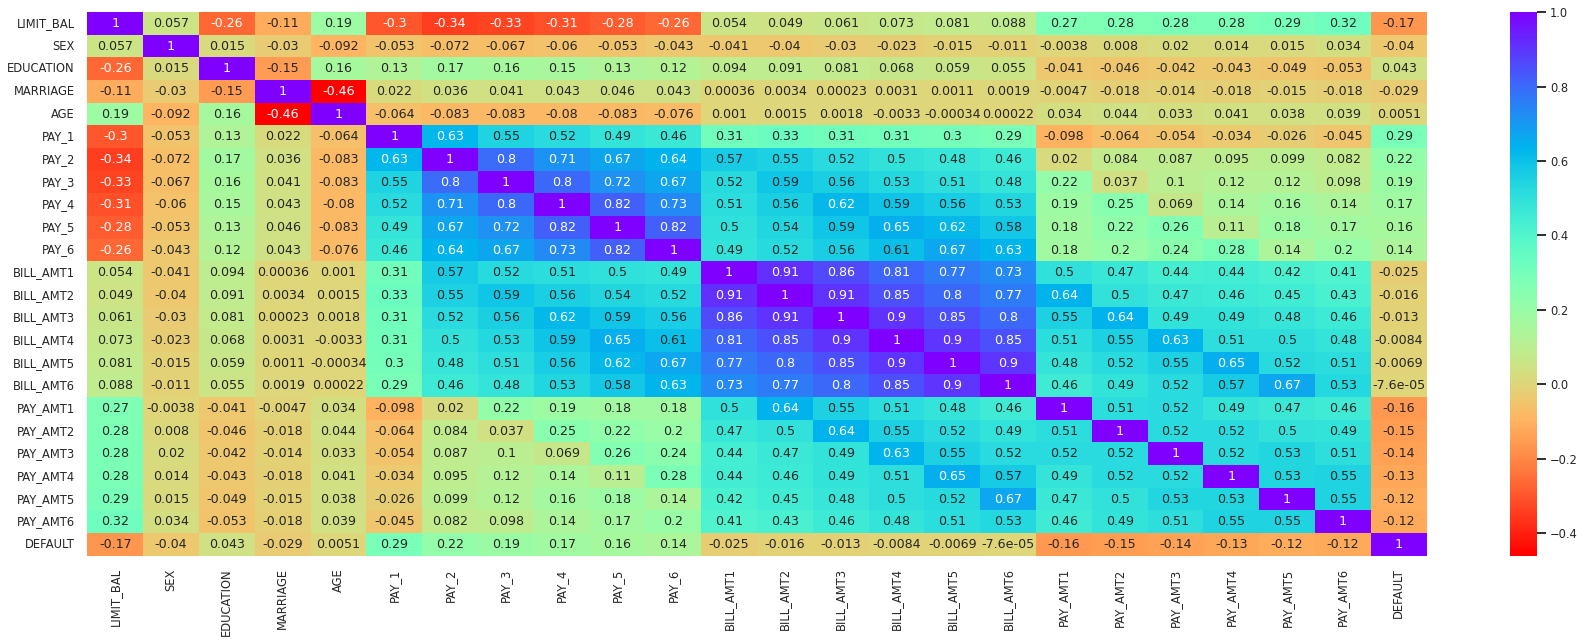

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)

In [ ]:
# Assuming 'df' is the DataFrame containing your data
correlations = df.drop("DEFAULT", axis=1).apply(lambda x: x.corr(df.DEFAULT, method='spearman'))

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

print(sorted_correlations)

PAY_1        0.292213
PAY_2        0.216919
PAY_3        0.194771
PAY_4        0.173690
PAY_5        0.159043
PAY_6        0.142523
EDUCATION    0.043425
AGE          0.005149
BILL_AMT6   -0.000076
BILL_AMT5   -0.006851
BILL_AMT4   -0.008357
BILL_AMT3   -0.012670
ID          -0.013952
BILL_AMT2   -0.015554
BILL_AMT1   -0.025327
MARRIAGE    -0.028698
SEX         -0.039961
PAY_AMT5    -0.116587
PAY_AMT6    -0.121444
PAY_AMT4    -0.127979
PAY_AMT3    -0.139388
PAY_AMT2    -0.150977
PAY_AMT1    -0.160493
LIMIT_BAL   -0.169586
dtype: float64
